### Multiple Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy, math
np.set_printoptions(precision=2)

In [2]:
data_X = [[1.24e+03, 3.00e+00, 1.00e+00, 6.40e+01],
       [1.95e+03, 3.00e+00, 2.00e+00, 1.70e+01],
       [1.72e+03, 3.00e+00, 2.00e+00, 4.20e+01],
       [1.96e+03, 3.00e+00, 2.00e+00, 1.50e+01],
       [1.31e+03, 2.00e+00, 1.00e+00, 1.40e+01],
       [8.64e+02, 2.00e+00, 1.00e+00, 6.60e+01],
       [1.84e+03, 3.00e+00, 1.00e+00, 1.70e+01],
       [1.03e+03, 3.00e+00, 1.00e+00, 4.30e+01],
       [3.19e+03, 4.00e+00, 2.00e+00, 8.70e+01],
       [7.88e+02, 2.00e+00, 1.00e+00, 8.00e+01],
       [1.20e+03, 2.00e+00, 2.00e+00, 1.70e+01],
       [1.56e+03, 2.00e+00, 1.00e+00, 1.80e+01],
       [1.43e+03, 3.00e+00, 1.00e+00, 2.00e+01],
       [1.22e+03, 2.00e+00, 1.00e+00, 1.50e+01],
       [1.09e+03, 2.00e+00, 1.00e+00, 6.40e+01],
       [8.48e+02, 1.00e+00, 1.00e+00, 1.70e+01],
       [1.68e+03, 3.00e+00, 2.00e+00, 2.30e+01],
       [1.77e+03, 3.00e+00, 2.00e+00, 1.80e+01],
       [1.04e+03, 3.00e+00, 1.00e+00, 4.40e+01],
       [1.65e+03, 2.00e+00, 1.00e+00, 2.10e+01],
       [1.09e+03, 2.00e+00, 1.00e+00, 3.50e+01],
       [1.32e+03, 3.00e+00, 1.00e+00, 1.40e+01],
       [1.59e+03, 0.00e+00, 1.00e+00, 2.00e+01],
       [9.72e+02, 2.00e+00, 1.00e+00, 7.30e+01],
       [1.10e+03, 3.00e+00, 1.00e+00, 3.70e+01],
       [1.00e+03, 2.00e+00, 1.00e+00, 5.10e+01],
       [9.04e+02, 3.00e+00, 1.00e+00, 5.50e+01],
       [1.69e+03, 3.00e+00, 1.00e+00, 1.30e+01],
       [1.07e+03, 2.00e+00, 1.00e+00, 1.00e+02],
       [1.42e+03, 3.00e+00, 2.00e+00, 1.90e+01],
       [1.16e+03, 3.00e+00, 1.00e+00, 5.20e+01],
       [1.94e+03, 3.00e+00, 2.00e+00, 1.20e+01],
       [1.22e+03, 2.00e+00, 2.00e+00, 7.40e+01],
       [2.48e+03, 4.00e+00, 2.00e+00, 1.60e+01],
       [1.20e+03, 2.00e+00, 1.00e+00, 1.80e+01],
       [1.84e+03, 3.00e+00, 2.00e+00, 2.00e+01],
       [1.85e+03, 3.00e+00, 2.00e+00, 5.70e+01],
       [1.66e+03, 3.00e+00, 2.00e+00, 1.90e+01],
       [1.10e+03, 2.00e+00, 2.00e+00, 9.70e+01],
       [1.78e+03, 3.00e+00, 2.00e+00, 2.80e+01],
       [2.03e+03, 4.00e+00, 2.00e+00, 4.50e+01],
       [1.78e+03, 4.00e+00, 2.00e+00, 1.07e+02],
       [1.07e+03, 2.00e+00, 1.00e+00, 1.00e+02],
       [1.55e+03, 3.00e+00, 1.00e+00, 1.60e+01],
       [1.95e+03, 3.00e+00, 2.00e+00, 1.60e+01],
       [1.22e+03, 2.00e+00, 2.00e+00, 1.20e+01],
       [1.62e+03, 3.00e+00, 1.00e+00, 1.60e+01],
       [8.16e+02, 2.00e+00, 1.00e+00, 5.80e+01],
       [1.35e+03, 3.00e+00, 1.00e+00, 2.10e+01],
       [1.57e+03, 3.00e+00, 1.00e+00, 1.40e+01],
       [1.49e+03, 3.00e+00, 1.00e+00, 5.70e+01],
       [1.51e+03, 2.00e+00, 1.00e+00, 1.60e+01],
       [1.10e+03, 3.00e+00, 1.00e+00, 2.70e+01],
       [1.76e+03, 3.00e+00, 2.00e+00, 2.40e+01],
       [1.21e+03, 2.00e+00, 1.00e+00, 1.40e+01],
       [1.47e+03, 3.00e+00, 2.00e+00, 2.40e+01],
       [1.77e+03, 3.00e+00, 2.00e+00, 8.40e+01],
       [1.65e+03, 3.00e+00, 1.00e+00, 1.90e+01],
       [1.03e+03, 3.00e+00, 1.00e+00, 6.00e+01],
       [1.12e+03, 2.00e+00, 2.00e+00, 1.60e+01],
       [1.15e+03, 3.00e+00, 1.00e+00, 6.20e+01],
       [8.16e+02, 2.00e+00, 1.00e+00, 3.90e+01],
       [1.04e+03, 3.00e+00, 1.00e+00, 2.50e+01],
       [1.39e+03, 3.00e+00, 1.00e+00, 6.40e+01],
       [1.60e+03, 3.00e+00, 2.00e+00, 2.90e+01],
       [1.22e+03, 3.00e+00, 1.00e+00, 6.30e+01],
       [1.07e+03, 2.00e+00, 1.00e+00, 1.00e+02],
       [2.60e+03, 4.00e+00, 2.00e+00, 2.20e+01],
       [1.43e+03, 3.00e+00, 1.00e+00, 5.90e+01],
       [2.09e+03, 3.00e+00, 2.00e+00, 2.60e+01],
       [1.79e+03, 4.00e+00, 2.00e+00, 4.90e+01],
       [1.48e+03, 3.00e+00, 2.00e+00, 1.60e+01],
       [1.04e+03, 3.00e+00, 1.00e+00, 2.50e+01],
       [1.43e+03, 3.00e+00, 1.00e+00, 2.20e+01],
       [1.16e+03, 3.00e+00, 1.00e+00, 5.30e+01],
       [1.55e+03, 3.00e+00, 2.00e+00, 1.20e+01],
       [1.98e+03, 3.00e+00, 2.00e+00, 2.20e+01],
       [1.06e+03, 3.00e+00, 1.00e+00, 5.30e+01],
       [1.18e+03, 2.00e+00, 1.00e+00, 9.90e+01],
       [1.36e+03, 2.00e+00, 1.00e+00, 1.70e+01],
       [9.60e+02, 3.00e+00, 1.00e+00, 5.10e+01],
       [1.46e+03, 3.00e+00, 2.00e+00, 1.60e+01],
       [1.45e+03, 3.00e+00, 2.00e+00, 2.50e+01],
       [1.21e+03, 2.00e+00, 1.00e+00, 1.50e+01],
       [1.55e+03, 3.00e+00, 2.00e+00, 1.60e+01],
       [8.82e+02, 3.00e+00, 1.00e+00, 4.90e+01],
       [2.03e+03, 4.00e+00, 2.00e+00, 4.50e+01],
       [1.04e+03, 3.00e+00, 1.00e+00, 6.20e+01],
       [1.62e+03, 3.00e+00, 1.00e+00, 1.60e+01],
       [8.03e+02, 2.00e+00, 1.00e+00, 8.00e+01],
       [1.43e+03, 3.00e+00, 2.00e+00, 2.10e+01],
       [1.66e+03, 3.00e+00, 1.00e+00, 6.10e+01],
       [1.54e+03, 3.00e+00, 1.00e+00, 1.60e+01],
       [9.48e+02, 3.00e+00, 1.00e+00, 5.30e+01],
       [1.22e+03, 2.00e+00, 2.00e+00, 1.20e+01],
       [1.43e+03, 2.00e+00, 1.00e+00, 4.30e+01],
       [1.66e+03, 3.00e+00, 2.00e+00, 1.90e+01],
       [1.21e+03, 3.00e+00, 1.00e+00, 2.00e+01],
       [1.05e+03, 2.00e+00, 1.00e+00, 6.50e+01]]

X_train = np.array(data_X)


In [3]:
data_y=[300.  , 509.8 , 394.  , 540.  , 415.  , 230.  , 560.  , 294.  ,
       718.2 , 200.  , 302.  , 468.  , 374.2 , 388.  , 282.  , 311.8 ,
       401.  , 449.8 , 301.  , 502.  , 340.  , 400.28, 572.  , 264.  ,
       304.  , 298.  , 219.8 , 490.7 , 216.96, 368.2 , 280.  , 526.87,
       237.  , 562.43, 369.8 , 460.  , 374.  , 390.  , 158.  , 426.  ,
       390.  , 277.77, 216.96, 425.8 , 504.  , 329.  , 464.  , 220.  ,
       358.  , 478.  , 334.  , 426.98, 290.  , 463.  , 390.8 , 354.  ,
       350.  , 460.  , 237.  , 288.3 , 282.  , 249.  , 304.  , 332.  ,
       351.8 , 310.  , 216.96, 666.34, 330.  , 480.  , 330.3 , 348.  ,
       304.  , 384.  , 316.  , 430.4 , 450.  , 284.  , 275.  , 414.  ,
       258.  , 378.  , 350.  , 412.  , 373.  , 225.  , 390.  , 267.4 ,
       464.  , 174.  , 340.  , 430.  , 440.  , 216.  , 329.  , 388.  ,
       390.  , 356.  , 257.8 ]

In [4]:
y_train = np.array(data_y)

In [5]:
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (99, 4), X Type:<class 'numpy.ndarray'>)
[[1.24e+03 3.00e+00 1.00e+00 6.40e+01]
 [1.95e+03 3.00e+00 2.00e+00 1.70e+01]
 [1.72e+03 3.00e+00 2.00e+00 4.20e+01]
 [1.96e+03 3.00e+00 2.00e+00 1.50e+01]
 [1.31e+03 2.00e+00 1.00e+00 1.40e+01]
 [8.64e+02 2.00e+00 1.00e+00 6.60e+01]
 [1.84e+03 3.00e+00 1.00e+00 1.70e+01]
 [1.03e+03 3.00e+00 1.00e+00 4.30e+01]
 [3.19e+03 4.00e+00 2.00e+00 8.70e+01]
 [7.88e+02 2.00e+00 1.00e+00 8.00e+01]
 [1.20e+03 2.00e+00 2.00e+00 1.70e+01]
 [1.56e+03 2.00e+00 1.00e+00 1.80e+01]
 [1.43e+03 3.00e+00 1.00e+00 2.00e+01]
 [1.22e+03 2.00e+00 1.00e+00 1.50e+01]
 [1.09e+03 2.00e+00 1.00e+00 6.40e+01]
 [8.48e+02 1.00e+00 1.00e+00 1.70e+01]
 [1.68e+03 3.00e+00 2.00e+00 2.30e+01]
 [1.77e+03 3.00e+00 2.00e+00 1.80e+01]
 [1.04e+03 3.00e+00 1.00e+00 4.40e+01]
 [1.65e+03 2.00e+00 1.00e+00 2.10e+01]
 [1.09e+03 2.00e+00 1.00e+00 3.50e+01]
 [1.32e+03 3.00e+00 1.00e+00 1.40e+01]
 [1.59e+03 0.00e+00 1.00e+00 2.00e+01]
 [9.72e+02 2.00e+00 1.00e+00 7.30e+01]
 [1.10e+03 3.0

In [6]:
X_features = ['size(sqft)','bedrooms','floors','age']

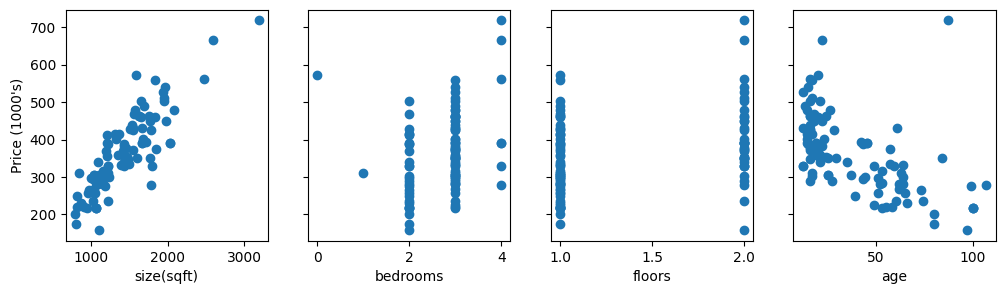

In [7]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

In [8]:
def zscore_normalize_features(X):
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)

In [9]:
# normalize the original features
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [1.42e+03 2.72e+00 1.38e+00 3.84e+01], 
X_sigma = [411.4    0.65   0.49  25.78]
Peak to Peak range by column in Raw        X:[2.4e+03 4.0e+00 1.0e+00 9.5e+01]
Peak to Peak range by column in Normalized X:[5.84 6.14 2.06 3.69]


In [10]:
b_init = 0
w_init = np.array([ 0, 0, 0, 0])

w_init shape: (4,), b_init type: <class 'int'>


In [11]:
# Function to predict the price
def predict(x, w, b): 
    p = np.dot(x, w) + b     
    return p  

In [12]:
# Cost Function Calculation
def compute_cost(X, y, w, b): 
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           
        cost = cost + (f_wb_i - y[i])**2       
    cost = cost / (2 * m)                          
    return cost

In [13]:
# Function to calculate the gradient
def compute_gradient(X, y, w, b): 
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.
    
    #updating the dj_dw and dj_db for all instance 
    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [14]:
# This cell is to understand how the gradient is updated
X=X_train
y=y_train
w=w_init
b=b_init
m,n = X.shape          
dj_dw = np.zeros((n,))
dj_db = 0.

for i in range(m):                             
    err = (np.dot(X[i], w) + b) - y[i]   
    print("Error for",i+1,err)
    for j in range(n):                         
        dj_dw[j] = dj_dw[j] + err * X[i, j]  
    print("dj_dw",dj_dw)  
    dj_db = dj_db + err  
    print("dj_db",dj_db)  
    
dj_dw = dj_dw / m                                
dj_db = dj_db / m                       

Error for 1 -300.0
dj_dw [-3.72e+05 -9.00e+02 -3.00e+02 -1.92e+04]
dj_db -300.0
Error for 2 -509.8
dj_dw [-1.37e+06 -2.43e+03 -1.32e+03 -2.79e+04]
dj_db -809.8
Error for 3 -394.0
dj_dw [-2043790.     -3611.4    -2107.6   -44414.6]
dj_db -1203.8
Error for 4 -540.0
dj_dw [-3102190.     -5231.4    -3187.6   -52514.6]
dj_db -1743.8
Error for 5 -415.0
dj_dw [-3.65e+06 -6.06e+03 -3.60e+03 -5.83e+04]
dj_db -2158.8
Error for 6 -230.0
dj_dw [-3.84e+06 -6.52e+03 -3.83e+03 -7.35e+04]
dj_db -2388.8
Error for 7 -560.0
dj_dw [-4.87e+06 -8.20e+03 -4.39e+03 -8.30e+04]
dj_db -2948.8
Error for 8 -294.0
dj_dw [-5.18e+06 -9.08e+03 -4.69e+03 -9.57e+04]
dj_db -3242.8
Error for 9 -718.2
dj_dw [-7.47e+06 -1.20e+04 -6.12e+03 -1.58e+05]
dj_db -3961.0
Error for 10 -200.0
dj_dw [-7.63e+06 -1.24e+04 -6.32e+03 -1.74e+05]
dj_db -4161.0
Error for 11 -302.0
dj_dw [-7.99e+06 -1.30e+04 -6.93e+03 -1.79e+05]
dj_db -4463.0
Error for 12 -468.0
dj_dw [-8.72e+06 -1.39e+04 -7.40e+03 -1.88e+05]
dj_db -4931.0
Error for 13 -374.2

In [16]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [17]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 10000
alpha = 0.001
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_norm, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_norm[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost 71223.98   
Iteration 1000: Cost 10223.88   
Iteration 2000: Cost  1922.89   
Iteration 3000: Cost   629.07   
Iteration 4000: Cost   365.12   
Iteration 5000: Cost   284.05   
Iteration 6000: Cost   249.90   
Iteration 7000: Cost   233.42   
Iteration 8000: Cost   225.12   
Iteration 9000: Cost   220.88   
b,w found by gradient descent: 363.14,[107.77 -19.95 -31.05 -38.42] 
prediction: 294.08, target value: 300.0
prediction: 486.28, target value: 509.8
prediction: 388.77, target value: 394.0
prediction: 491.88, target value: 540.0
prediction: 417.54, target value: 415.0
prediction: 223.20, target value: 230.0
prediction: 521.30, target value: 560.0
prediction: 270.36, target value: 294.0
prediction: 676.18, target value: 718.2
prediction: 182.43, target value: 200.0
prediction: 320.41, target value: 302.0
prediction: 477.07, target value: 468.0
prediction: 409.43, target value: 374.2
prediction: 392.47, target value: 388.0
prediction: 285.39, target value: 282.0
p

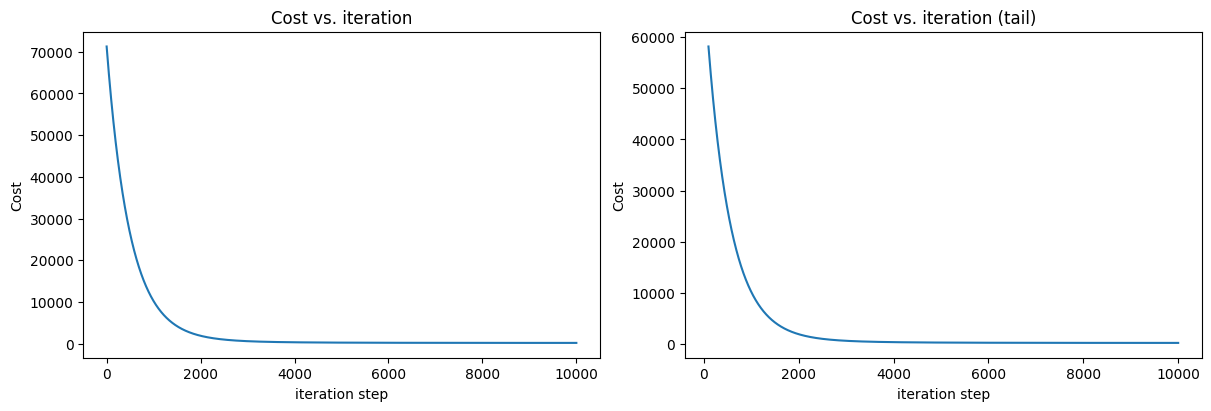

In [18]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()